In [25]:
import pandas as pd
import numpy as np
import random
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns
import re
import copy
import xlsxwriter
import statsmodels.api as sm
import matplotlib.dates as mdates
import datetime
from matplotlib.dates import DateFormatter
from sklearn import datasets, linear_model

In [27]:
pd.set_option('display.max_rows', 500)
'''
pd.DataFrame({'fecha_semana':tablon_mmm.fecha_semana,
              'trafico_sesiones_total_orange':tablon_mmm.trafico_sesiones_prospecto_orange}).head(150)
'''

"\npd.DataFrame({'fecha_semana':tablon_mmm.fecha_semana,\n              'trafico_sesiones_total_orange':tablon_mmm.trafico_sesiones_prospecto_orange}).head(150)\n"

## Carga tablón datos

In [28]:
tablon_mmm = pd.read_csv("../data/tablon_3_marcas_unido_202005_v1.csv",sep=";")
# Fecha en formato datetime y
# con nombre común fecha_semana
if 'fecha_semana' in list(tablon_mmm.columns):
        tablon_mmm['fecha_semana'] = pd.to_datetime(tablon_mmm['fecha_semana'], format='%Y-%m-%d')
elif 'fecha' in list(tablon_mmm.columns):
        tablon_mmm['fecha_semana'] = pd.to_datetime(tablon_mmm['fecha'], format='%Y-%m-%d')
        
tablon_mmm.head()

,fecha_semana,cociente_precio_comunicado__jazztel_competidores_movistar_masmovil,cociente_precio_comunicado__jazztel_competidores_orange_masmovil,cociente_precio_comunicado__jazztel_competidores_orange_movistar,cociente_precio_comunicado__jazztel_competidores_orange_vodafone,cociente_precio_comunicado__jazztel_competidores_orange_yoigo,cociente_precio_comunicado__jazztel_competidores_vodafone_masmovil,cociente_precio_comunicado__jazztel_competidores_vodafone_yoigo,cociente_precio_comunicado__jazztel_competidores_yoigo_masmovil,cociente_precio_comunicado__jazztel_competidores_yoigo_movistar,...,trafico_sesiones_seo_prospecto_movil_amena,trafico_sesiones_sms_interno_cliente_desktop_amena,trafico_sesiones_sms_interno_cliente_movil_amena,trafico_sesiones_sms_interno_prospecto_desktop_amena,trafico_sesiones_sms_interno_prospecto_movil_amena,trafico_sesiones_social_cliente_desktop_amena,trafico_sesiones_social_cliente_movil_amena,trafico_sesiones_social_prospecto_desktop_amena,trafico_sesiones_social_prospecto_movil_amena,trafico_sesiones_total_amena
0,2018-01-01,0.544119,0.635636,0.395627,0.485970,0.518354,0.731027,0.580082,0.806854,0.455832,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2018-01-08,0.544119,0.612009,0.386343,0.472037,0.502533,0.731027,0.580082,0.806854,0.455832,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2018-01-15,0.544119,0.612009,0.386343,0.472037,0.502533,0.731027,0.580082,0.806854,0.455832,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2018-01-22,0.542684,0.612009,0.385619,0.472037,0.502533,0.731027,0.580082,0.806854,0.454825,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2018-01-29,0.542684,0.612009,0.385619,0.464055,0.502533,0.712057,0.568074,0.806854,0.454825,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Empleamos funcion add_variables

busqueda_orange


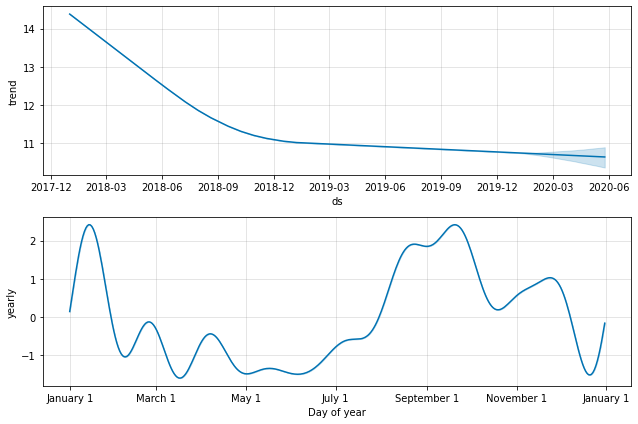

publicidad_impresiones_rrss_total_jazztel_MM_4
publicidad_impresiones_rrss_total_jazztel_MM_8
publicidad_inversion_rrss_total_jazztel_MM_4
publicidad_inversion_rrss_total_jazztel_MM_8
publicidad_inversion_rrss_total_jazztel_ad20_MM_4
publicidad_inversion_rrss_total_jazztel_ad20_MM_8
publicidad_envios_mail_total_jazztel_MM_4
publicidad_envios_mail_total_jazztel_MM_8
publicidad_impresiones_display_brand_jazztel_MM_4
publicidad_impresiones_display_brand_jazztel_MM_8
publicidad_impresiones_display_brand_jazztel_ad20_MM_4
publicidad_impresiones_display_brand_jazztel_ad20_MM_8
publicidad_impresiones_display_total_jazztel_ad20_MM_4
publicidad_impresiones_display_total_jazztel_ad20_MM_8
queries_google_generica_total_MM_4
queries_google_generica_total_MM_8
queries_google_generica_total_MM_4
queries_google_generica_total_MM_8
marca_consideracion_marca_fusionado_jazztel_estandar_MM_4
marca_consideracion_marca_fusionado_jazztel_estandar_MM_8
marca_consideracion_marca_fusionado_jazztel_estandar_MM_

/home/alumno/.local/lib/python3.6/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [29]:
# Importar función
import sys
sys.path.append('..')

from mmmtools.tablon import add_variables

tablon_mmm = add_variables(tablon_mmm)

In [31]:
tablon_mmm.to_csv("../data/tablon_3_marcas_unido_202005_v1_TOT.csv",sep=";")

## Añadimos confianza, sesiones de GA para jazztel, Coronavirus y tiendas_stands jazztel

In [9]:
#tablon_mmm = pd.read_csv("../data/tablonAbril2020_v20200616.csv")
tablon = pd.read_csv("../data/indice_confianza_revisado.csv", sep=';')
tablon.fecha_semana=pd.to_datetime(tablon.fecha_semana, format='%Y-%m-%d')
tablonNuevo=tablon_mmm.merge(tablon, how='left',left_on='fecha_semana', right_on='fecha_semana')
tablonNuevo['indice_confianza'] = tablonNuevo['indice_confianza'].astype(float)
tablonNuevo['indice_confianza']=tablonNuevo.indice_confianza.interpolate()
tablon_mmm['indice_confianza']=tablonNuevo['indice_confianza']

"""
tablon = pd.read_csv("../data/sesiones_jazztel.csv", sep=';')
tablon.fecha=pd.to_datetime(tablon.fecha, format='%d/%m/%Y')
#tablon.fecha = tablon.fecha.dt.strftime('%Y-%m-%d')
tablonNuevo=tablon_mmm.merge(tablon, how='left',left_on='fecha_semana', right_on='fecha')
tablonNuevo["fecha"]=tablonNuevo["fecha_x"]
tablon_mmm['sesiones_original_jazztel'] = tablonNuevo['sesiones_original_jazztel']
tablon_mmm['sesiones_corregidas_jazztel'] = tablonNuevo['sesiones_corregidas_jazztel']
"""
tablon = pd.read_csv("../data/coronavirus.csv", sep=';')
tablon.fecha_semana=pd.to_datetime(tablon.fecha_semana, format='%Y-%m-%d')
tablonNuevo=tablon_mmm.merge(tablon, how='left',left_on='fecha_semana', right_on='fecha_semana')
#tablon_mmm['coronavirus'] = tablon_mmm['fecha']
tablon_mmm['coronavirus'] = tablonNuevo['coronavirus']
tablon_mmm['coronavirus'] = tablon_mmm['coronavirus'].fillna(0)


tiendas = pd.read_csv('../data/tiendas_jazztel.csv',sep=';')
tablon_mmm['mes_anyo'] = tablon_mmm['fecha_semana'].apply(lambda x: x.strftime('%m-%Y'))
tablon_mmm = pd.merge(tablon_mmm,tiendas, how='left',on =['mes_anyo'])
fecha_i_test = pd.to_datetime('20200316', format='%Y%m%d')
fecha_j_test = pd.to_datetime('20200427', format='%Y%m%d')
tablon_mmm['numero_tiendas_stand_jazztel'] = np.where((tablon_mmm['fecha_semana'] >= fecha_i_test) & (tablon_mmm['fecha_semana'] <= fecha_j_test),
                                                      0,tablon_mmm['numero_tiendas_stand_jazztel'])

## Actualizar consideracion y Notoriedad

In [76]:
"""
dfFechasConsideracion=tablon_mmm.groupby(tablon_mmm['fecha_semana'].apply(lambda x: x.strftime('%Y%m')))["fecha"].max()
dfFechasConsideracion=(dfFechasConsideracion.reset_index())
dfFechasConsideracion.columns=['fechaMes','fecha_semana']
dfDatosmensualConsideracion = pd.read_csv('../data/ODS_09_202004.csv',sep=';',header=None)
dfDatosmensualConsideracion.columns=['fechaMes',
                                     'marca_consideracion_marca_fusionado_orange_estandar',
                                     'marca_notoriedad_total_fusionado_orange_estandar',
                                     'marca_consideracion_marca_fusionado_jazztel_estandar',
                                     'marca_notoriedad_total_fusionado_jazztel_estandar' ]

dfDatosmensualConsideracion.fechaMes=pd.to_datetime(dfDatosmensualConsideracion.fechaMes, format='%Y%m')
dfFechasConsideracion.fechaMes=pd.to_datetime(dfFechasConsideracion.fechaMes, format='%Y%m')
dfFechasConsideracion.fecha_semana=pd.to_datetime(dfFechasConsideracion.fecha_semana, format='%Y-%m-%d')
dfDatosmensualConsideracion = pd.merge(dfFechasConsideracion,dfDatosmensualConsideracion, how='left',on =['fechaMes'])

dfDatosmensualConsideracion = pd.merge(tablon_mmm[['fecha_semana']],dfDatosmensualConsideracion, how='left',on =['fecha_semana'])



listaCamposConsideracion=['marca_consideracion_marca_fusionado_orange_estandar',
                          'marca_notoriedad_total_fusionado_orange_estandar',
                          'marca_consideracion_marca_fusionado_jazztel_estandar',
                          'marca_notoriedad_total_fusionado_jazztel_estandar' ]

for x in listaCamposConsideracion:
    dfDatosmensualConsideracion[x] =dfDatosmensualConsideracion[x].str.replace(',','.')
    dfDatosmensualConsideracion[x] =dfDatosmensualConsideracion[x].astype(float)
    dfDatosmensualConsideracion[x] =dfDatosmensualConsideracion[x].interpolate()

listaCamposConsideracion.append('fecha_semana')
dfDatosmensualConsideracion = pd.merge(tablon_mmm[listaCamposConsideracion],dfDatosmensualConsideracion, how='left',on =['fecha_semana'])


fecha_i_test = pd.to_datetime('20170626', format='%Y%m%d')
listaCamposConsideracion=['marca_consideracion_marca_fusionado_orange_estandar',
                          'marca_notoriedad_total_fusionado_orange_estandar',
                          'marca_consideracion_marca_fusionado_jazztel_estandar',
                          'marca_notoriedad_total_fusionado_jazztel_estandar' ]
for x in listaCamposConsideracion:
    dfDatosmensualConsideracion[x+'_y']=np.where((dfDatosmensualConsideracion['fecha_semana'] <= fecha_i_test),
                                                      dfDatosmensualConsideracion[x+'_x'],dfDatosmensualConsideracion[x+'_y'])
    tablon_mmm[x]=dfDatosmensualConsideracion[x+'_y']

tablon_mmm['marca_consideracion_convergente_orange']=tablon_mmm['marca_consideracion_marca_fusionado_orange_estandar']
tablon_mmm['marca_consideracion_convergente_jazztel']=tablon_mmm['marca_consideracion_marca_fusionado_jazztel_estandar']
tablon_mmm['marca_notoriedad_total_convergente_orange']=tablon_mmm['marca_notoriedad_total_fusionado_orange_estandar']
tablon_mmm['marca_notoriedad_total_convergente_jazztel']=tablon_mmm['marca_notoriedad_total_fusionado_jazztel_estandar']
"""

'\ndfFechasConsideracion=tablon_mmm.groupby(tablon_mmm[\'fecha_semana\'].apply(lambda x: x.strftime(\'%Y%m\')))["fecha"].max()\ndfFechasConsideracion=(dfFechasConsideracion.reset_index())\ndfFechasConsideracion.columns=[\'fechaMes\',\'fecha_semana\']\ndfDatosmensualConsideracion = pd.read_csv(\'../data/ODS_09_202004.csv\',sep=\';\',header=None)\ndfDatosmensualConsideracion.columns=[\'fechaMes\',\n                                     \'marca_consideracion_marca_fusionado_orange_estandar\',\n                                     \'marca_notoriedad_total_fusionado_orange_estandar\',\n                                     \'marca_consideracion_marca_fusionado_jazztel_estandar\',\n                                     \'marca_notoriedad_total_fusionado_jazztel_estandar\' ]\n\ndfDatosmensualConsideracion.fechaMes=pd.to_datetime(dfDatosmensualConsideracion.fechaMes, format=\'%Y%m\')\ndfFechasConsideracion.fechaMes=pd.to_datetime(dfFechasConsideracion.fechaMes, format=\'%Y%m\')\ndfFechasConsidera

## Añadir variables busquedas Google

In [10]:
import pandas as pd
file_path = '../data/organicas.csv'

def createGoogledf(file_path):
        organicas = pd.read_csv(file_path, sep =';',decimal = ",")
        organicas.rename(columns={'Indexed queries':'queries'},inplace=True)
        organicas['Product'] = organicas.Product.apply(lambda x: x.lower())
        organicas['Brand'] = organicas.Brand.apply(lambda x: x.lower())
        organicas['StartDate'] = pd.to_datetime(organicas['StartDate'], format='%d/%m/%Y')
        organicas['dia_semana']=organicas.StartDate.dt.weekday
        organicas['timedelta']=organicas.dia_semana.apply(lambda x: pd.Timedelta(days=x))
        organicas['fecha_semana']=organicas.StartDate - organicas.timedelta
        df = organicas[['queries']].groupby(by=[organicas.fecha_semana,organicas.Product,organicas.Brand]).sum()
        df.reset_index(inplace=True)
        return df


def getGoogleQueriesMarcaGenerica(df,categoria,target):
    lista = ['convergence', 'enterprise solutions', 'fiber', 'fixed broadband', 'mobile services', 'mobile smartphones', 'tv']
    target = target.lower()
    categoria = categoria.lower()
    if categoria in ['marca','m+g']:
        if categoria =='marca':
            data = df[(df['Product']=='pure brand')&(df['Brand']==target)][['fecha_semana','queries']].reset_index(drop=True)
            colname = 'queries_google_marca_pura_'+target
            data.rename(columns={'queries':colname},inplace=True)
            return data
        elif categoria == 'm+g':
            data = df[(df['Brand']==target)&(df['Product'].isin(lista))][['fecha_semana','queries']].reset_index(drop=True)
            data_2 = data[['queries']].groupby(by=[data.fecha_semana]).sum()
            data_2.reset_index(inplace=True)
            colname = 'queries_google_marca_generica_'+target
            data_2.rename(columns={'queries':colname},inplace=True)
            return data_2
    else:
        print('Las categorías son: marca, m+g')

# lista = ['convergence', 'enterprise solutions', 'fiber', 'fixed broadband', 'mobile services', 'mobile smartphones', 'tv']
def getGoogleQueriesGenerica(df,keyword):
    lista = ['convergence', 'enterprise solutions', 'fiber', 'fixed broadband', 'mobile services', 'mobile smartphones', 'tv']
    keyword = keyword.lower()
    if keyword == 'total':
        data = df[(df['Brand']=='generic')&(df['Product'].isin(lista))][['fecha_semana','queries']]
        data_2 = data[['queries']].groupby(by=[data.fecha_semana]).sum()
        data_2.reset_index(inplace=True)
        colname = 'queries_google_generica_total'
        data_2.rename(columns={'queries':colname},inplace=True)
        return data_2
    else:
        data = df[(df['Product']==keyword)&(df['Brand']=='generic')][['fecha_semana','queries']].reset_index(drop=True)
        colname = 'queries_google_generica_'+keyword
        data.rename(columns={'queries':colname},inplace=True)
        return data


# CODIGO PARA EJECUTAR EN EL NOTEBOOK: AÑADE LAS COLUMNAS AL TABLÓN.


 

In [143]:
targets = ['movistar','yoigo','masmovil','amena','vodafone','orange','jazztel',
           'Digimobil','Euskaltel','Fi Network','Lebara','Llamaya','Lowi','O2','ONO','Pepephone',
           'R','Simyo','Telecable','Tuenti','Virgin']
    
keywords = ['convergence', 'enterprise solutions', 'fiber', 'fixed broadband', 'mobile services', 'mobile smartphones', 'tv','total']

df = createGoogledf(file_path)
    
for categoria in ['marca','m+g','generica']:
    if categoria != 'generica':
        for target in targets:
            tablon_mmm = pd.merge(tablon_mmm,getGoogleQueriesMarcaGenerica(df,categoria,target), how='left',on =['fecha_semana'])
    else:
         for keyword in keywords:
            tablon_mmm = pd.merge(tablon_mmm,getGoogleQueriesGenerica(df,keyword), how='left',on =['fecha_semana'])

## Corregimos indices promos a Nan

In [144]:
def ajustarCamposNan(tablon,listaCampos,listaFechas):

    for campo in listaCampos:
        tablon[campo] = tablon[campo].fillna(0)

    for fecha in listaFechas:
            fechaAjuste= pd.to_datetime(fecha, format='%Y-%m-%d')
            fechaAnterior=fechaAjuste+datetime.timedelta(days=-7)
           
            for campo in listaCampos:  
                tablon[campo] = np.where(tablon['fecha_semana']== fechaAjuste,
                                         tablon.loc[tablon['fecha_semana']== fechaAnterior,campo],tablon[campo])
    return tablon

In [145]:

listaFechas=[
'2017-04-10',
'2018-03-26',
'2018-12-31',
'2019-04-15',
'2019-08-12',
'2019-12-23'
]
listaCampos=['indice_promo_jazztel',
'indice_promo_masmovil',
'indice_promo_movistar',
'indice_promo_orange',
'indice_promo_vodafone',
'indice_promo_yoigo']

tablon_mmm=ajustarCamposNan(tablon_mmm,listaCampos,listaFechas)


## Añadimos la serie total de sesiones prospecto corregida (bajon error medición)

In [172]:
dfSesionesProspectoCorregidas = pd.read_csv('../data/sesiones_ajustadas_jazztel.csv',sep=';')
dfSesionesProspectoCorregidas.head(200)
#tablon_mmm['trafico_sesiones_total_jazztel_corregida']=dfSesionesProspectoCorregidas['trafico_sesiones_total_jazztel_corregida']
#tablon_mmm[['fecha_semana','trafico_sesiones_total_jazztel_corregida']].head(150)

,fecha_semana,trafico_sesiones_total_jazztel_corregida
0,02/01/2017,0
1,09/01/2017,0
2,16/01/2017,0
3,23/01/2017,0
4,30/01/2017,0
5,06/02/2017,0
6,13/02/2017,0
7,20/02/2017,0
8,27/02/2017,0
9,06/03/2017,0


## Actualizar los valores Enero-Abril 2018 con los de la serie ajustada que se uso en Abril

In [146]:
def reemplazarValoresColumnaTablon(tablon1,columna1,tablon2,columna2,fechaInicio,fechaFin):
    
    tablon_1=tablon1[['fecha_semana',columna1]]
    tablon_2=tablon2[['fecha_semana',columna2]]

    fecha1= pd.to_datetime(fechaInicio, format='%Y%m%d')
    fecha2 = pd.to_datetime(fechaFin, format='%Y%m%d')

    fechas_cambio_1 = tablon_1.loc[((tablon_1['fecha_semana'] >= fecha1) &
                    (tablon_1['fecha_semana'] <= fecha2)),'fecha_semana']
    
    fechas_cambio_2 = tablon_2.loc[((tablon_2['fecha_semana'] >= fecha1) &
                    (tablon_2['fecha_semana'] <= fecha2)),'fecha_semana']


    for fecha in fechas_cambio_1:
        posicion_1=tablon_1['fecha_semana'].tolist().index(fecha)
        posicion_2=tablon_2['fecha_semana'].tolist().index(fecha)
        
        tablon_1.iloc[posicion_1,tablon_1.columns.get_loc(columna1)]=tablon_2.iloc[posicion_2,tablon_2.columns.get_loc(columna2)]

   
    return tablon_1[columna1]

In [147]:
tablonAbril = pd.read_csv("../data/tablonAbril2020_Completo_v20200714_v1.csv",sep=';')
# Fecha en formato datetime y
# con nombre común fecha_semana
if 'fecha_semana' in list(tablonAbril.columns):
        tablonAbril['fecha_semana'] = pd.to_datetime(tablonAbril['fecha_semana'], format='%Y-%m-%d')
elif 'fecha' in list(tablonAbril.columns):
        tablonAbril['fecha_semana'] = pd.to_datetime(tablonAbril['fecha'], format='%Y-%m-%d')

In [148]:
tablon_mmm['trafico_sesiones_total_jazztel']=reemplazarValoresColumnaTablon(tablon_mmm,
                                                                               'trafico_sesiones_total_jazztel',
                                                                               tablonAbril,
                                                                              'trafico_sesiones_total_jazztel_corregida',
                                                                               '20180101',
                                                                               '20180430'
                                                                              )

/home/osboxes/anaconda3/envs/mmm/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


## Añadimos y ajustamos la serie de sesiones prospecto de Orange

In [179]:
def ajustarSerieTemporal(tablon,columna,fechaInicio,fechaFin):
    
    tablon_serie=tablon[['fecha_semana',columna]]
    t=np.arange(1,tablon.shape[0]+1)

    
    regr = linear_model.LinearRegression()
    tablon_serie['prediccion']=regr.fit(t.reshape(-1, 1), tablon_serie[columna]).predict(t.reshape(-1, 1))

    tablon_serie['residuos']=tablon_serie[columna]-tablon_serie['prediccion']

    fecha1= pd.to_datetime(fechaInicio, format='%Y%m%d')
    fecha2 = pd.to_datetime(fechaFin, format='%Y%m%d')

    fechas_cambio = tablon_serie.loc[((tablon_serie['fecha_semana'] >= fecha1) &
                    (tablon_serie['fecha_semana'] <= fecha2)),'fecha_semana']


    for fecha in fechas_cambio:
        posicion=tablon_serie['fecha_semana'].tolist().index(fecha)
        tablon_serie.iloc[posicion,tablon_serie.columns.get_loc('residuos')]=tablon_serie.iloc[posicion+52,tablon_serie.columns.get_loc('residuos')]

    tablon_serie[columna +'_corregida']= tablon_serie['prediccion']+tablon_serie['residuos']
    
    return tablon_serie[columna +'_corregida']

In [181]:
tablon_series_orange = pd.read_csv("../data/sesiones_corregida_orange.csv",sep=';')
# Fecha en formato datetime y
# con nombre común fecha_semana
if 'fecha_semana' in list(tablon_series_orange.columns):
        tablon_series_orange['fecha_semana'] = pd.to_datetime(tablon_series_orange['fecha_semana'], format='%Y-%m-%d')
elif 'fecha' in list(tablon.columns):
        tablon_series_orange['fecha_semana'] = pd.to_datetime(tablon_series_orange['fecha'], format='%Y-%m-%d')


tablon_series_orange['trafico_sesiones_prospecto_orange_ajustado']=ajustarSerieTemporal(tablon_series_orange,'trafico_sesiones_prospecto_orange_corregido','20180430','20180528')
#tablon_mmm['trafico_sesiones_prospecto_orange_ajustado']=0
'''
tablon_mmm['trafico_sesiones_prospecto_orange_ajustado']=reemplazarValoresColumnaTablon(tablon_mmm,
                                                                                        'trafico_sesiones_prospecto_orange_ajustado',
                                                                                         tablon_series_orange,
                                                                                         'trafico_sesiones_prospecto_orange_ajustado',
                                                                                         '20180101',
                                                                                         '20200525'
                                                                                          )
'''

"\ntablon_mmm['trafico_sesiones_prospecto_orange_ajustado']=reemplazarValoresColumnaTablon(tablon_mmm,\n                                                                                        'trafico_sesiones_prospecto_orange_ajustado',\n                                                                                         tablon_series_orange,\n                                                                                         'trafico_sesiones_prospecto_orange_ajustado',\n                                                                                         '20180101',\n                                                                                         '20200525'\n                                                                                          )\n"

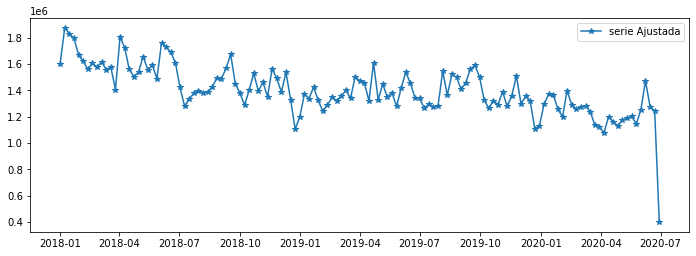

In [182]:
fig_dims = (30/2.54, 10/2.54)
fig, ax = plt.subplots(figsize=fig_dims)
#for var in ['trafico_sesiones_prospecto_orange_corregido','trafico_sesiones_prospecto_orange_ajustado']:

var='trafico_sesiones_prospecto_orange_ajustado'
plt.plot(tablon_series_orange['fecha_semana'], tablon_series_orange[var], label='serie Ajustada',marker='*')
#plt.plot(tablonAbril['fecha_semana'], tablonAbril[var], label='Abril',marker='*')


#plt.plot(tablon_series_orange_mayo['fecha_semana'], tablon_series_orange_mayo['trafico_sesiones_prospecto_orange_ajustado'], label=var,marker='*')    
#plt.plot(dfSesionesAjustadaPrevias['fecha_semana'], dfSesionesAjustadaPrevias['trafico_sesiones_total_jazztel_corregida'], label='serie_ajustada_inicial',marker='*')

plt.legend()
plt.show()

In [87]:
fecha_i_entrenamiento = pd.to_datetime('20180101', format='%Y%m%d')
fecha_j_entrenamiento = pd.to_datetime('20200525', format='%Y%m%d')
tablon_mmm = tablon_mmm[((tablon_mmm['fecha_semana'] > fecha_i_entrenamiento) &
                (tablon_mmm['fecha_semana'] <= fecha_j_entrenamiento))]

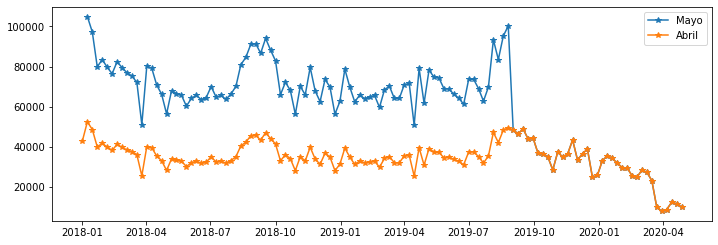

In [175]:
fig_dims = (30/2.54, 10/2.54)
fig, ax = plt.subplots(figsize=fig_dims)
#for var in ['trafico_sesiones_prospecto_orange_corregido','trafico_sesiones_prospecto_orange_ajustado']:



#tablonMayo['trafico_sesiones_total_jazztel_corregida']=tablonMayo['trafico_sesiones_prospecto_movil_jazztel']+tablonMayo['trafico_sesiones_prospecto_desktop_jazztel']
#
var='publicidad_total_inversion_online_jazztel'
var_='publicidad_clics_display_total_orange'
var_='publicidad_impresiones_marca_generica_sem_orange_oficial_orange_reseller'
var_='precio_comunicado_movistar'
var_='marca_consideracion_marca_fusionado_jazztel_estandar'
var_='intensidad_promocional_orange'
var_='indice_promo_orange'
var='negocio_trafico_telefonico_captacion_inbound_mas_teleweb_mas_distrisnetas_jazztel'
var='negocio_trafico_telefonico_captacion_inbound_mas_teleweb_orange'
#var='queries_google_marca_pura_orange'
#plt.plot(tablonAbril['fecha_semana'], tablonAbril['trafico_sesiones_total_jazztel_corregida'], label='Abril',marker='*')
#plt.plot(dfSesionesProspectoCorregidas['fecha_semana'], dfSesionesProspectoCorregidas['total corregida'], label='serie_corregida',marker='*')
#plt.plot(dftablonPrevio['fecha_semana'], dftablonPrevio['trafico_sesiones_total_jazztel'], label='serie_tablon_inicial',marker='*')
#plt.plot(tablon_mmm['fecha_semana'], tablon_mmm['trafico_sesiones_total_jazztel'], label='Mayo',marker='*')

plt.plot(tablon_mmm['fecha_semana'], tablon_mmm[var], label='Mayo',marker='*')
plt.plot(tablonAbril['fecha_semana'], tablonAbril[var], label='Abril',marker='*')


#plt.plot(tablon_series_orange_mayo['fecha_semana'], tablon_series_orange_mayo['trafico_sesiones_prospecto_orange_ajustado'], label=var,marker='*')    
#plt.plot(dfSesionesAjustadaPrevias['fecha_semana'], dfSesionesAjustadaPrevias['trafico_sesiones_total_jazztel_corregida'], label='serie_ajustada_inicial',marker='*')

plt.legend()
plt.show()

In [153]:
tablon_mmm[['fecha_semana','indice_promo_orange']].head(150)

,fecha_semana,indice_promo_orange
0,2017-01-02,6.181425
1,2017-01-09,2.697520
2,2017-01-16,2.697520
3,2017-01-23,2.697520
4,2017-01-30,2.698331
5,2017-02-06,2.698331
6,2017-02-13,2.698331
7,2017-02-20,2.698331
8,2017-02-27,2.400000
9,2017-03-06,2.400000


## Añadimos la serie de estacionalidad temperatura actualizada desde el tablon nuevo

In [ ]:
"""
tablonActualizado = pd.read_csv("../data/tablon_regenerado_202004_v3(20200625).csv",sep=";")
tablon_mmm['estacionalidad_temperatura']=tablonActualizado['estacionalidad_temperatura']
"""

## Guardamos el tablon

In [158]:
tablon_mmm.to_csv("../data/tablonMayo2020_Completo_v20200720_v1.csv", sep=';',index=False)

## Comprobaciones de los datos

In [165]:


fecha_i_entrenamiento = pd.to_datetime('20180101', format='%Y%m%d')
fecha_j_entrenamiento = pd.to_datetime('20200427', format='%Y%m%d')
tablon_mmm = tablon_mmm[((tablon_mmm['fecha_semana'] > fecha_i_entrenamiento) &
                (tablon_mmm['fecha_semana'] <= fecha_j_entrenamiento))]


tablon=tablon_mmm

In [ ]:
variablesEDA=getNombresVariables(tablon_mmm,"google","google")
#tablaCorrelacion(tablon_mmm,variablesEDA).style.background_gradient(cmap='coolwarm')
#variablesEDA=["trafico_sesiones_prospecto_jazztel", 
#                       "trafico_sesiones_prospecto_desktop_jazztel",                       
#                       "trafico_sesiones_prospecto_movil_jazztel"]
pintarSeries(tablon_mmm,variablesEDA)

In [ ]:
tablon1= pd.read_csv("../data/tablon_regenerado_202004_v3(20200625).csv",sep=";")
# Fecha en formato datetime y
# con nombre común fecha_semana
if 'fecha_semana' in list(tablon1.columns):
        tablon1['fecha_semana'] = pd.to_datetime(tablon1['fecha_semana'], format='%Y-%m-%d')
elif 'fecha' in list(tablon.columns):
        tablon1['fecha_semana'] = pd.to_datetime(tablon1['fecha'], format='%Y-%m-%d')

tablon1['fecha']=tablon1['fecha_semana']
        

        
tablon2= pd.read_csv("../data/tablonAbril2020_v20200624_Ampliado.csv",sep=";")
# Fecha en formato datetime y
# con nombre común fecha_semana
if 'fecha_semana' in list(tablon2.columns):
        tablon2['fecha_semana'] = pd.to_datetime(tablon2['fecha_semana'], format='%Y-%m-%d')
elif 'fecha' in list(tablon.columns):
        tablon2['fecha_semana'] = pd.to_datetime(tablon2['fecha'], format='%Y-%m-%d')

In [ ]:
getNombresVariables(tablon1,"prospecto","jazztel")

In [ ]:
getNombresVariablesSinVentas(tablon2,"google","google")
getNombresVariablesSinVentas(tablon2,"clics_marca","jazztel")

In [ ]:
variablesEDA=getNombresVariablesSinVentas(tablon2,"trafico_sesiones_prospecto","jazztel")
#variablesEDA=getNombresVariablesSinVentas(tablon2,"clics_marca","jazztel")
#CompararSeriesTablones(tablon1,tablon2,variablesEDA)
CompararSeriesNormalizadas(tablon2,variablesEDA)

In [ ]:
variablesEDA=['publicidad_clics_marca_generica_sem_jazztel',
 'publicidad_clics_marca_generica_sem_jazztel_reseller',
 'publicidad_clics_marca_sem_jazztel',
 'publicidad_clics_marca_sem_jazztel_reseller']
pintarSeriesJuntas(tablon2,variablesEDA)

In [ ]:
variablesEDA=getNombresVariablesSinVentas(tablon2,"indice_promo","jazztel")
pintarSeries(tablon2,variablesEDA)

In [ ]:
variablesEDA=getNombresVariablesSinVentas(tablon2,"indice_promo","indice_promo")

variablesEDA2=['indice_promo_jazztel',
'indice_promo_masmovil',
'indice_promo_movistar',
'indice_promo_orange',
'indice_promo_vodafone',
'indice_promo_yoigo']

tablon2[tablon2.indice_promo_jazztel.isna() + tablon2.indice_promo_orange.isna()][['fecha']+variablesEDA2].head(200)
tablon2[['fecha']+variablesEDA2].head(200)                                                

In [ ]:
def ajustarCamposNan(tablon,listaCampos,listaFechas):

    for campo in listaCampos:
        tablon[campo] = tablon[campo].fillna(0)

    for fecha in listaFechas:
            fechaAjuste= pd.to_datetime(fecha, format='%Y-%m-%d')
            fechaAnterior=fechaAjuste+datetime.timedelta(days=-7)
           
            for campo in listaCampos:  
                tablon[campo] = np.where(tablon2['fecha_semana']== fechaAjuste,
                                         tablon2.loc[tablon2['fecha_semana']== fechaAnterior,campo],tablon2[campo])
    return tablon



In [ ]:
listaFechas=[
'2017-04-10',
'2018-03-26',
'2018-12-31',
'2019-04-15',
'2019-08-12',
'2019-12-23'
]
listaCampos=['indice_promo_jazztel',
'indice_promo_masmovil',
'indice_promo_movistar',
'indice_promo_orange',
'indice_promo_vodafone',
'indice_promo_yoigo']

tablon2=ajustarCamposNan(tablon2,listaCampos,listaFechas)

In [ ]:
tablon2[['fecha']+variablesEDA2].head(200)

In [ ]:
getNombresVariablesSinVentas(tablon_mmm,"queries_google","queries_google")

/home/osboxes/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/osboxes/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,fecha_semana,trafico_sesiones_total_orange,prediccion,residuos
53,2018-01-08,2198020,2.427738e+06,-229717.895949
54,2018-01-15,2099511,2.402708e+06,-303196.658840
55,2018-01-22,2041261,2.377677e+06,-336416.421731
56,2018-01-29,1897886,2.352647e+06,-454761.184623
57,2018-02-05,1835659,2.327617e+06,-491957.947514


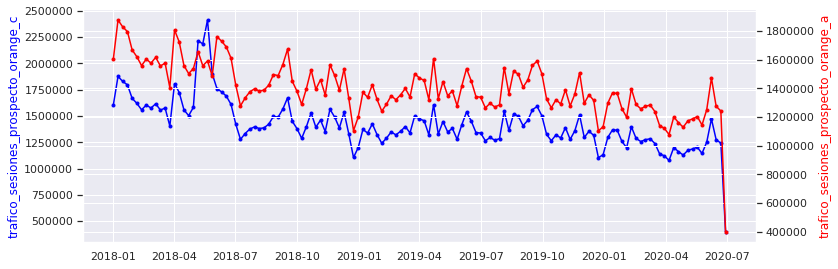

In [150]:
pintarSeriesDobleEje(tablon_series_orange,'trafico_sesiones_prospecto_orange_corregido',
                     'trafico_sesiones_prospecto_orange_ajustado')

In [151]:

fecha1 = pd.to_datetime('20190429', format='%Y%m%d')
fecha2 = pd.to_datetime('20190527', format='%Y%m%d')


fecha3 = pd.to_datetime('20200427', format='%Y%m%d')
fecha4 = pd.to_datetime('20200525', format='%Y%m%d')

tablon_series_orange_mayo = tablon_series_orange[(((tablon_series_orange['fecha_semana'] >= fecha1) &
                (tablon_series_orange['fecha_semana'] <= fecha2)) |
                ((tablon_series_orange['fecha_semana'] >= fecha3) &
                (tablon_series_orange['fecha_semana'] <= fecha4)))]

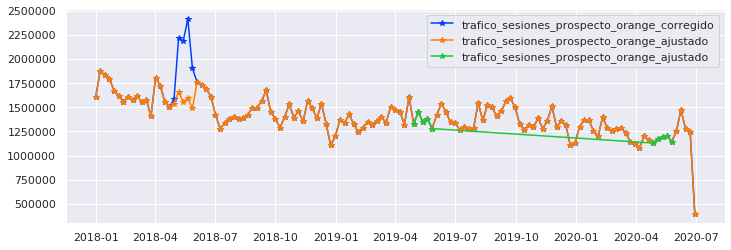

In [152]:
fig_dims = (30/2.54, 10/2.54)
fig, ax = plt.subplots(figsize=fig_dims)
for var in ['trafico_sesiones_prospecto_orange_corregido','trafico_sesiones_prospecto_orange_ajustado']:
    plt.plot(tablon_series_orange['fecha_semana'], tablon_series_orange[var], label=var,marker='*')

    
plt.plot(tablon_series_orange_mayo['fecha_semana'], tablon_series_orange_mayo['trafico_sesiones_prospecto_orange_ajustado'], label=var,marker='*')    
plt.legend()
plt.show()

In [134]:
tablon_series_orange_mayo.head(10)

,fecha_semana,trafico_sesiones_prospecto_orange_corregido,trafico_sesiones_prospecto_orange_ajustado
69,2019-04-29,1328733,1328733.0
70,2019-05-06,1447500,1447500.0
71,2019-05-13,1348644,1348644.0
72,2019-05-20,1381831,1381831.0
73,2019-05-27,1278713,1278713.0
121,2020-04-27,1128797,1128797.0
122,2020-05-04,1173213,1173213.0
123,2020-05-11,1186914,1186914.0
124,2020-05-18,1203159,1203159.0
125,2020-05-25,1144236,1144236.0
